In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
adv = pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv', usecols=[1,2,3,4])

In [ ]:
adv

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
#Null Values
adv.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
#data analysis
pd.set_option('precision',2)
adv.describe()

,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,14.02
std,85.85,14.85,21.78,5.22
min,0.70,0.00,0.30,1.60
25%,74.38,9.97,12.75,10.38
50%,149.75,22.90,25.75,12.90
75%,218.82,36.52,45.10,17.40
max,296.40,49.60,114.00,27.00


In [ ]:
#we can say that the min value of radio is zero. we need to confirm how many zero value exists in the dataset

In [ ]:
#analysis of zero values
(adv==0).sum(axis=0)

TV           0
Radio        1
Newspaper    0
Sales        0
dtype: int64

In [ ]:
#only one row of radio variable contains the 0 value hence cleaning step is not required

In [ ]:
#response variable analysis
adv.Sales.value_counts()

9.7     5
12.9    4
11.7    4
15.9    4
25.4    3
       ..
15.7    1
14.2    1
11.2    1
19.4    1
18.5    1
Name: Sales, Length: 121, dtype: int64

In [ ]:
#this confirms that response variable is continous. the unique values are 121 out of 200

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


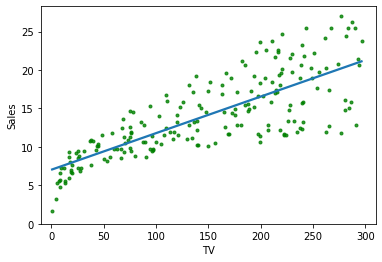

In [ ]:
sns.regplot(adv.TV, adv.Sales, order=1, ci=None, scatter_kws={'color':'g', 's':9})

plt.xlim(-10,310)
plt.ylim(bottom= 0)
plt.show()

# order 1 for linear model
# ci - confidence interval 
# scatter_kws Color - red , size - 9

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


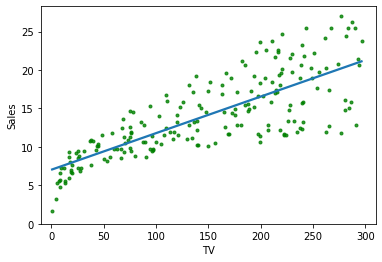

In [ ]:
sns.regplot(adv.TV, adv.Sales, order=1, ci=None, scatter_kws={'color':'g', 's':9})

plt.xlim(-10,310)
plt.ylim(bottom= 0)
plt.show()

In [ ]:
#Scale the Data
from sklearn.preprocessing import scale

In [ ]:
X= scale(adv.TV, with_mean= True, with_std=False).reshape(-1,1)
y= adv.Sales

In [ ]:
X[0:5]

array([[  83.0575],
       [-102.5425],
       [-129.8425],
       [   4.4575],
       [  33.7575]])

In [ ]:
X.mean()

1.0089706847793422e-14

In [ ]:
X.std()

85.63933175679269

In [ ]:
#linear regression using sklearn (scaled data)
import sklearn.linear_model as skl_lm
regr = skl_lm.LinearRegression()
regr.fit(X,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
regr.intercept_

14.0225

In [ ]:
regr.coef_

array([0.04753664])

In [ ]:
regr = skl_lm.LinearRegression()

x = adv.TV.values.reshape(-1,1)

y = adv.Sales

regr.fit(x,y)

regr.intercept_

7.032593549127695

In [ ]:
#RSS using sklearn(scaled data)
min_rss =  np.sum((regr.intercept_ + regr.coef_ * X - y.values.reshape(-1,1))**2)

min_rss


2102.5305831313512

In [ ]:
##RSS using sklearn(unscaled data)
regr = skl_lm.LinearRegression()
X = adv.TV.values.reshape(-1,1)
y = adv.Sales
regr.fit(X,y)
regr.intercept_
regr.coef_


array([0.04753664])

In [ ]:
#RSS & MSE(unscaled)
min_rss = np.sum((regr.intercept_+regr.coef_*X-y.values.reshape(-1,1))**2)
min_rss

2102.5305831313512

In [ ]:
mse = min_rss/len(y)
mse

10.512652915656757

In [ ]:
#MSE, R-sq using sklearn
from sklearn.metrics import mean_squared_error, r2_score
Sales_pred = regr.predict(X)
r2_score(y,Sales_pred)

0.611875050850071

In [ ]:
mean_squared_error(y,Sales_pred)

10.512652915656757

In [ ]:
#regression summary using statsmodels TV
import statsmodels.formula.api as smf
est = smf.ols('Sales~TV',adv).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 03 May 2021   Prob (F-statistic):           1.47e-42
Time:                        05:49:13   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#regression RSS, MSE using statsmodels
est.params

Intercept    7.03
TV           0.05
dtype: float64

In [ ]:
((adv.Sales- (est.params[0]+est.params[1]*adv.TV))**2).sum()

2102.530583131351

In [ ]:
#MSE
((adv.Sales- (est.params[0]+est.params[1]*adv.TV))**2).sum()/len(adv.Sales)

10.512652915656753

In [ ]:
#Radio
est = smf.ols('Sales~Radio',adv).fit()
print(est.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243


In [ ]:
#for newspaper
est = smf.ols('Sales~Newspaper',adv).fit()
print(est.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087


In [ ]:
#multiple linear regression
est= smf.ols('Sales~TV + Radio+ Newspaper', adv).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 03 May 2021   Prob (F-statistic):           1.58e-96
Time:                        05:53:56   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#correlation
adv.corr()

,TV,Radio,Newspaper,Sales
TV,1.00,0.05,0.06,0.78
Radio,0.05,1.00,0.35,0.58
Newspaper,0.06,0.35,1.00,0.23
Sales,0.78,0.58,0.23,1.00
